In [2]:
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
# from Drone_Data_Functions import *

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import numpy as np
import h5py, glob
import pandas as pd
import pygeodesy


In [3]:
dronedat394 = pd.read_csv('/hirax/rf_data/yale_drone_testing/20210414/raw_csvs/FLY394.csv')

/home/erk26/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (255,259,260,261,296,321) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dronedat394.keys()

Index(['Tick#', 'offsetTime', 'IMU_ATTI(0):Longitude', 'IMU_ATTI(0):Latitude',
       'IMU_ATTI(0):numSats', 'IMU_ATTI(0):barometer:Raw',
       'IMU_ATTI(0):barometer:Smooth', 'IMU_ATTI(0):accel:X',
       'IMU_ATTI(0):accel:Y', 'IMU_ATTI(0):accel:Z',
       ...
       'RTKdata:posFlg_0', 'RTKdata:posFlg_1', 'RTKdata:posFlg_2',
       'RTKdata:posFlg_3', 'RTKdata:posFlg_4', 'RTKdata:posFlg_5',
       'RTKdata:GpsState', 'Attribute|Value', 'ConvertDatV3', '3.7.6'],
      dtype='object', length=324)

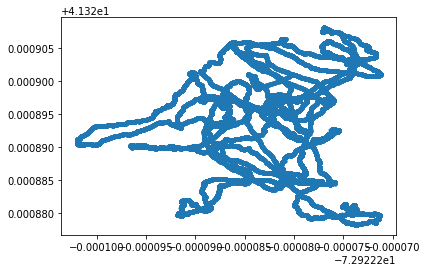

In [5]:
plt.plot(dronedat394['IMU_ATTI(0):Longitude'][:-10], dronedat394['IMU_ATTI(0):Latitude'][:-10], '.')

In [6]:
dronedat395 = pd.read_csv('/hirax/rf_data/yale_drone_testing/20210414/raw_csvs/FLY395.csv')

/home/erk26/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (117,118,119,120,121,122,123,124,125,126,265,269,270,271,306,331) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


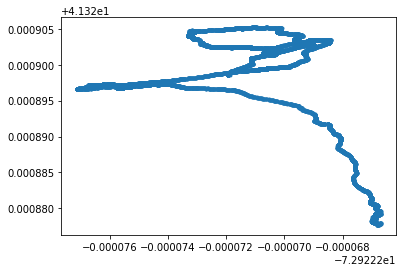

In [7]:
plt.plot(dronedat395['IMU_ATTI(0):Longitude'][:-10], dronedat395['IMU_ATTI(0):Latitude'][:-10], '.')

In [8]:
keys = dronedat395.keys()

In [9]:
for key in keys:
    if 'Lat' in key or 'LAT' in key: print(key)

IMU_ATTI(0):Latitude
GPS(0):Lat
GPS(1):Lat
GPS(2):Lat
HP:Latitude
IMU_ATTI(1):Latitude
IMU_ATTI(2):Latitude
IMUEX(0):rtk_Latitude
IMUEX(1):rtk_Latitude
IMUEX(2):rtk_Latitude
RTKdata:Lat_P
RTKdata:Lat_S


In [10]:
print(dronedat395['GPS:dateTimeStamp'][1])
print(list(dronedat395['GPS:dateTimeStamp'])[-1])

2021-04-14T20:52:35Z
2021-04-14T20:54:22Z


In [11]:
dronedat396 = pd.read_csv('/hirax/rf_data/yale_drone_testing/20210414/raw_csvs/FLY396.csv')

/home/erk26/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (255,259,260,261,290,315) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
print(dronedat396['GPS:dateTimeStamp'][1])
print(list(dronedat396['GPS:dateTimeStamp'])[-1])

2021-04-14T20:54:56Z
2021-04-14T20:57:29Z


In [13]:
dronedat397 = pd.read_csv('/hirax/rf_data/yale_drone_testing/20210414/raw_csvs/FLY397.csv')
print(dronedat397['GPS:dateTimeStamp'][1])
print(list(dronedat397['GPS:dateTimeStamp'])[-2])

/home/erk26/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (50,65,80,105,106,117,118,119,120,121,122,123,124,125,126,265,267,269,270,271,306,331) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2021-04-14T20:58:09Z
nan


(0, 1000)

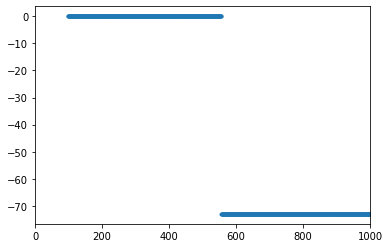

In [14]:
plt.plot(dronedat397['IMU_ATTI(0):Longitude'], '.')
plt.xlim(0,1000)

In [15]:
dronedat397.keys()[109]

'HP:Longitude'

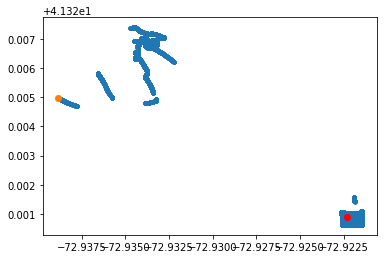

In [16]:
plt.plot(dronedat397['IMU_ATTI(0):Longitude'][600:], dronedat397['IMU_ATTI(0):Latitude'][600:], '.')
plt.plot(list(dronedat397['IMU_ATTI(0):Longitude'])[-1], list(dronedat397['IMU_ATTI(0):Latitude'])[-1], 'o')
plt.plot(list(dronedat397['IMU_ATTI(0):Longitude'])[600], list(dronedat397['IMU_ATTI(0):Latitude'])[600], 'o', color = 'red')


#home point is reset before flight

In [17]:
def latlonpairconvert(Latitude, Longitude, hmsl):
    x = []
    y = []

    prime_origin=pygeodesy.EcefCartesian(latlonh0=start_coords[0],\
                    lon0=start_coords[1],height0=start_coords[2])
    p_t=pygeodesy.ellipsoidalNvector.LatLon(Latitude,Longitude,hmsl)
    coords_xyz_prime=prime_origin.forward(p_t).toVector() 
    x.append(coords_xyz_prime[0])
    y.append(coords_xyz_prime[1])
    return(x,y)

# def latlonpairconvert(Latitude, Longitude, hmsl):
#     Latitude = list(Latitude)
#     Longitude = list(Longitude)
#     hmsl = list(hmsl)
#     x = []
#     y = []
#     Lat = [i for i in list(Latitude) if i>10]
#     Lon = [i for i in list(Longitude) if i<-10]
#     hmsl =[hmsl[i] for i in range(len(Latitude)) if Latitude[i] >= 10]
#     badindeces = [i for i in range(len(Latitude)) if Latitude[i] <= 10]
#     goodindeces = [i for i in range(len(Latitude)) if Latitude[i] >= 10]

#     prime_origin=pygeodesy.EcefCartesian(latlonh0=start_coords[0],\
#                     lon0=start_coords[1],height0=start_coords[2],name='BMX_Tower_Center')
#     p_t=pygeodesy.ellipsoidalNvector.LatLon(Latitude,Longitude,hmsl)
#     coords_xyz_prime=prime_origin.forward(p_t).toVector() 
#     x.append(coords_xyz_prime[0])
#     y.append(coords_xyz_prime[1])
#     return(x,y)

def latlonconvert2(Latitude, Longitude, hmsl):
    Latitude = list(Latitude)
    Longitude = list(Longitude)
    hmsl = list(hmsl)
    x = []
    y = []
    Lat = [i for i in list(Latitude) if i>10]
    Lon = [i for i in list(Longitude) if i<-10]
    hmsl =[hmsl[i] for i in range(len(Latitude)) if Latitude[i] >= 10]
    badindeces = [i for i in range(len(Latitude)) if Latitude[i] <= 10]
    goodindeces = [i for i in range(len(Latitude)) if Latitude[i] >= 10]
    
    start_coords = [41.320817157916004, -72.92196151905819, 53.16061800000001]
    prime_origin=pygeodesy.EcefCartesian(latlonh0=start_coords[0],\
                    lon0=start_coords[1],height0=start_coords[2])
    
    for i in range(len(Lat)):
        p_t=pygeodesy.ellipsoidalNvector.LatLon(Lat[i],Lon[i],hmsl[i])
        coords_xyz_prime=prime_origin.forward(p_t).toVector() 
        x.append(coords_xyz_prime[0])
        y.append(coords_xyz_prime[1])
    return(x,y, badindeces, goodindeces)

In [18]:
start_coords = [41.320817157916004, -72.92196151905819, 53.16061800000001]

In [19]:
gpskeyslat = []
gpskeyslon = []
for key in keys:
    if 'Lat' in key or 'LAT' in key: gpskeyslat.append(key)
    if 'Lon' in key or 'LON' in key: gpskeyslon.append(key)
        

In [20]:
for i in range(len(gpskeyslat)):
    print(gpskeyslat[i], gpskeyslon[i])

IMU_ATTI(0):Latitude IMU_ATTI(0):Longitude
GPS(0):Lat GPS(0):Long
GPS(1):Lat GPS(1):Long
GPS(2):Lat GPS(2):Long
HP:Latitude HP:Longitude
IMU_ATTI(1):Latitude IMU_ATTI(1):Longitude
IMU_ATTI(2):Latitude IMU_ATTI(2):Longitude
IMUEX(0):rtk_Latitude IMUEX(0):rtk_Longitude
IMUEX(1):rtk_Latitude IMUEX(1):rtk_Longitude
IMUEX(2):rtk_Latitude IMUEX(2):rtk_Longitude
RTKdata:Lat_P RTKdata:Lon_P
RTKdata:Lat_S RTKdata:Lon_S


In [21]:
gpsdat = {}

for i in range(len(gpskeyslat)):
    coords = latlonconvert2(dronedat397[gpskeyslat[i]][600:], dronedat397[gpskeyslon[i]][600:], dronedat397['GPS(0):heightMSL'][600:])
    gpsdat[gpskeyslat[i]] = coords

In [22]:
imu0 = latlonconvert2(dronedat397['IMU_ATTI(0):Latitude'][600:], dronedat397['IMU_ATTI(0):Longitude'][600:], dronedat397['GPS(0):heightMSL'][600:])

In [24]:
# plt.plot(test[0], test[1], '.')

In [25]:
class GPS_Data:
    def __init__(self,gps_directory,filenumber,Origin_llh):
#         print('DRONE CLASS initialized -- Loading Drone RTK Data from '+FLYTAG.split('_Drone_')[0]+':')
        self.fn=filenumber
        self.Origin_llh=Origin_llh
        self.prime_origin=pygeodesy.EcefCartesian(latlonh0=Origin_llh[0],lon0=Origin_llh[1],height0=Origin_llh[2],name='BMX_Tower_Center')
       
        ## Read Drone RTK Data
        drone_data = pd.read_csv(gps_directory+filenumber,sep=",",header=0)

        # turn the timestamps into real datetime objects
        drone_data = drone_data.assign(UTC = pd.to_datetime(df.UTC))
        
        
        ## Assign Drone RTK Data to class variables:
        self.latitude, self.longitude, self.pitch, self.roll, self.yaw, self.hmsl = \
        np.array(drone_data.Lat), np.array(drone_data.Lon), np.array(drone_data.pitch), np.array(drone_data.roll), np.array(drone_data.yaw), np.array(drone_data.HMSL)
        
#         self.t_arr_timestamp=np.array(drone_data.timestamp)
        self.t_arr_timestamp=np.array(drone_data.UTC)
        self.t_index=np.arange(len(self.t_arr_timestamp))
       
    ## Construct useful secondary class variables
        self.altitude=np.array(drone_data.HMSL)[:]-Origin_llh[2]
        
    ## Define coordinate systems we will eventually want to use:

        print( "generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.")
        self.coords_llh=np.ndarray((self.t_index.shape[0],3))        ## Lat,Lon,hmsl from drone/RTK
        self.coords_xyz=np.ndarray((self.t_index.shape[0],3))        ## x,y,z in meters in geocentric cartesian
        self.coords_xyz_prime=np.ndarray((self.t_index.shape[0],3))  ## x,y,z cartesian wrt a chosen origin (x=E,y=N,z=up)
        self.coords_rpt_prime=np.ndarray((self.t_index.shape[0],3))  ## r,theta,phi wrt a chosen origin
        ## Populate and calculate these coordinate systems:
        for i in self.t_index:
            ## Create LatLon point for each recorded drone position:
            p_t=pygeodesy.ellipsoidalNvector.LatLon(self.latitude[i],lon=self.longitude[i],height=self.hmsl[i])
            ## Assign llh, xyz, xyz_prime, rpt_prime coordinates, pointwise:
            self.coords_llh[i]=p_t.to3llh()
            self.coords_xyz[i]=p_t.to3xyz()
            self.coords_xyz_prime[i]=self.prime_origin.forward(p_t).toVector()        
            r_prime=np.sqrt(self.coords_xyz_prime[i,0]**2.0+self.coords_xyz_prime[i,1]**2.0+self.coords_xyz_prime[i,2]**2.0)      
            phi_prime=np.arctan2(self.coords_xyz_prime[i,1],self.coords_xyz_prime[i,0])
            if phi_prime<0:
                phi_prime=phi_prime+(2.0*np.pi)
            theta_prime=np.arccos(self.coords_xyz_prime[i,2]/r_prime)
            self.coords_rpt_prime[i]=[r_prime,phi_prime,theta_prime]
        
        tight_layout()

        
        
class GPS_Data_fromdf:
    def __init__(self,drone_data,Origin_llh):
#         print('DRONE CLASS initialized -- Loading Drone RTK Data from '+FLYTAG.split('_Drone_')[0]+':')
#         self.fn=filenumber
        self.Origin_llh=Origin_llh
        self.prime_origin=pygeodesy.EcefCartesian(latlonh0=Origin_llh[0],lon0=Origin_llh[1],height0=Origin_llh[2],name='BMX_Tower_Center')
       
        ## Read Drone RTK Data
#         drone_data = pd.read_csv(gps_directory+filenumber,sep=",",header=0)

#         # turn the timestamps into real datetime objects
#         drone_data = drone_data.assign(UTC = pd.to_datetime(df.UTC))
        
        
        ## Assign Drone RTK Data to class variables:
        self.latitude, self.longitude, self.pitch, self.roll, self.yaw, self.hmsl = \
        np.array(drone_data.Lat), np.array(drone_data.Lon), np.array(drone_data.pitch), np.array(drone_data.roll), np.array(drone_data.yaw), np.array(drone_data.HMSL)
        
#         self.t_arr_timestamp=np.array(drone_data.timestamp)
        self.t_arr_timestamp=np.array(drone_data.UTC)
        self.t_index=np.arange(len(self.t_arr_timestamp))
       
    ## Construct useful secondary class variables
        self.altitude=np.array(drone_data.HMSL)[:]-Origin_llh[2]
        
    ## Define coordinate systems we will eventually want to use:

        print( "generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.")
        self.coords_llh=np.ndarray((self.t_index.shape[0],3))        ## Lat,Lon,hmsl from drone/RTK
        self.coords_xyz=np.ndarray((self.t_index.shape[0],3))        ## x,y,z in meters in geocentric cartesian
        self.coords_xyz_prime=np.ndarray((self.t_index.shape[0],3))  ## x,y,z cartesian wrt a chosen origin (x=E,y=N,z=up)
        self.coords_rpt_prime=np.ndarray((self.t_index.shape[0],3))  ## r,theta,phi wrt a chosen origin
        ## Populate and calculate these coordinate systems:
        for i in self.t_index:
            ## Create LatLon point for each recorded drone position:
            p_t=pygeodesy.ellipsoidalNvector.LatLon(self.latitude[i],lon=self.longitude[i],height=self.hmsl[i])
            ## Assign llh, xyz, xyz_prime, rpt_prime coordinates, pointwise:
            self.coords_llh[i]=p_t.to3llh()
            self.coords_xyz[i]=p_t.to3xyz()
            self.coords_xyz_prime[i]=self.prime_origin.forward(p_t).toVector()        
            r_prime=np.sqrt(self.coords_xyz_prime[i,0]**2.0+self.coords_xyz_prime[i,1]**2.0+self.coords_xyz_prime[i,2]**2.0)      
            phi_prime=np.arctan2(self.coords_xyz_prime[i,1],self.coords_xyz_prime[i,0])
            if phi_prime<0:
                phi_prime=phi_prime+(2.0*np.pi)
            theta_prime=np.arccos(self.coords_xyz_prime[i,2]/r_prime)
            self.coords_rpt_prime[i]=[r_prime,phi_prime,theta_prime]
        
        tight_layout()
 

In [26]:
# gpstest = GPS_Data("/hirax/rf_data/yale_drone_testing/20210414/annie_gps/","04141938", start_coords)
# read the first file
df = pd.read_csv("/hirax/rf_data/yale_drone_testing/20210414/annie_gps/04142053",sep=",",header=0)
# read the second file
new_df = pd.read_csv("/hirax/rf_data/yale_drone_testing/20210414/annie_gps/04142126",sep=',', header=0)
# glue them together and reindex
df = pd.concat([df, new_df], axis=0, join='inner')
df.reset_index(drop=True, inplace=True)
# turn the timestamp strings into proper numpy datetime objects
df = df.assign(UTC = pd.to_datetime(df.UTC))

annieflightdata = GPS_Data_fromdf(df, start_coords)

/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  if sys.path[0] == '':


generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.


<Figure size 432x288 with 0 Axes>

In [27]:
dronedat397.keys()[109]

'HP:Longitude'

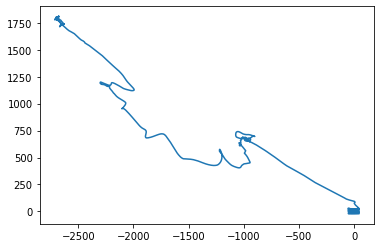

In [30]:
plt.plot(annieflightdata.coords_xyz_prime[:,0], annieflightdata.coords_xyz_prime[:,1])

/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if sys.path[0] == '':


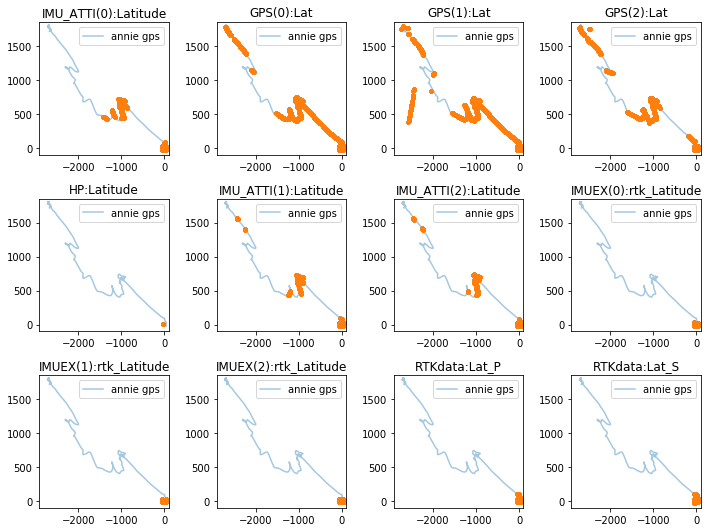

In [130]:
fig = plt.figure(figsize = (10,7.5))
counter = 1
for key in gpsdat.keys():
    ax = fig.add_subplot(3,4,counter)
    ax.plot(annieflightdata.coords_xyz_prime[:,0], annieflightdata.coords_xyz_prime[:,1], alpha = 0.4, label = 'annie gps')
    ax.plot(gpsdat[key][0], gpsdat[key][1], '.')
    ax.set_xlim(-2900,100)
    ax.set_ylim(-100,1850)
    ax.legend()
    ax.set_title(key)
    counter +=1
plt.tight_layout()

In [32]:
# homepoint = latlonconvert2(dronedat397['IMU_ATTI(0):Longitude'][600:], dronedat397['IMU_ATTI(0):Latitude'][600:], dronedat397['GPS(0):heightMSL'][600:])
homepoint = latlonconvert2(dronedat397['IMU_ATTI(0):Latitude'][600:], dronedat397['IMU_ATTI(0):Longitude'][600:], dronedat397['GPS(0):heightMSL'][600:])



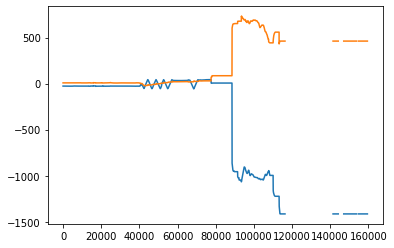

In [33]:
plt.plot(homepoint[0])
plt.plot(homepoint[1])

# plt.plot(dronedat397['IMU_ATTI(0):HMSL'])

[]

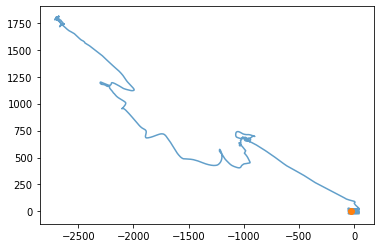

In [34]:
plt.plot(annieflightdata.coords_xyz_prime[:,0], annieflightdata.coords_xyz_prime[:,1], alpha = 0.7, label = 'annie gps')
plt.plot(homepoint[0][0], homepoint[1][0], 'o')
plt.plot(homepoint[0][-10], homepoint[1][-10], 'o', color= 'red')

plt.plot()

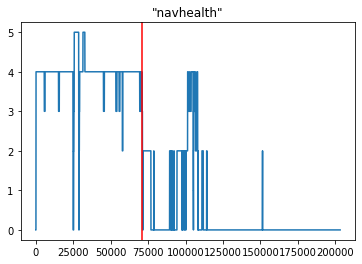

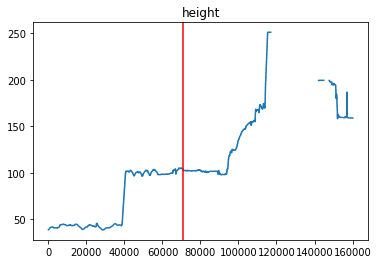

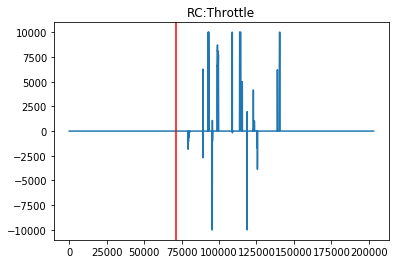

In [136]:
plt.plot(dronedat397.navHealth)
plt.axvline(71000, color = 'red')
plt.title('"navhealth"')
plt.show()

plt.plot(dronedat397['GPS(0):heightMSL'])
plt.axvline(71000, color = 'red')
plt.title('height')
plt.show()

plt.plot(dronedat397['RC:Throttle'])
plt.axvline(71000, color = 'red')
plt.title('RC:Throttle')
plt.show()


In [37]:
len(dronedat397.keys())/3

111.33333333333333

In [38]:
28*4

112

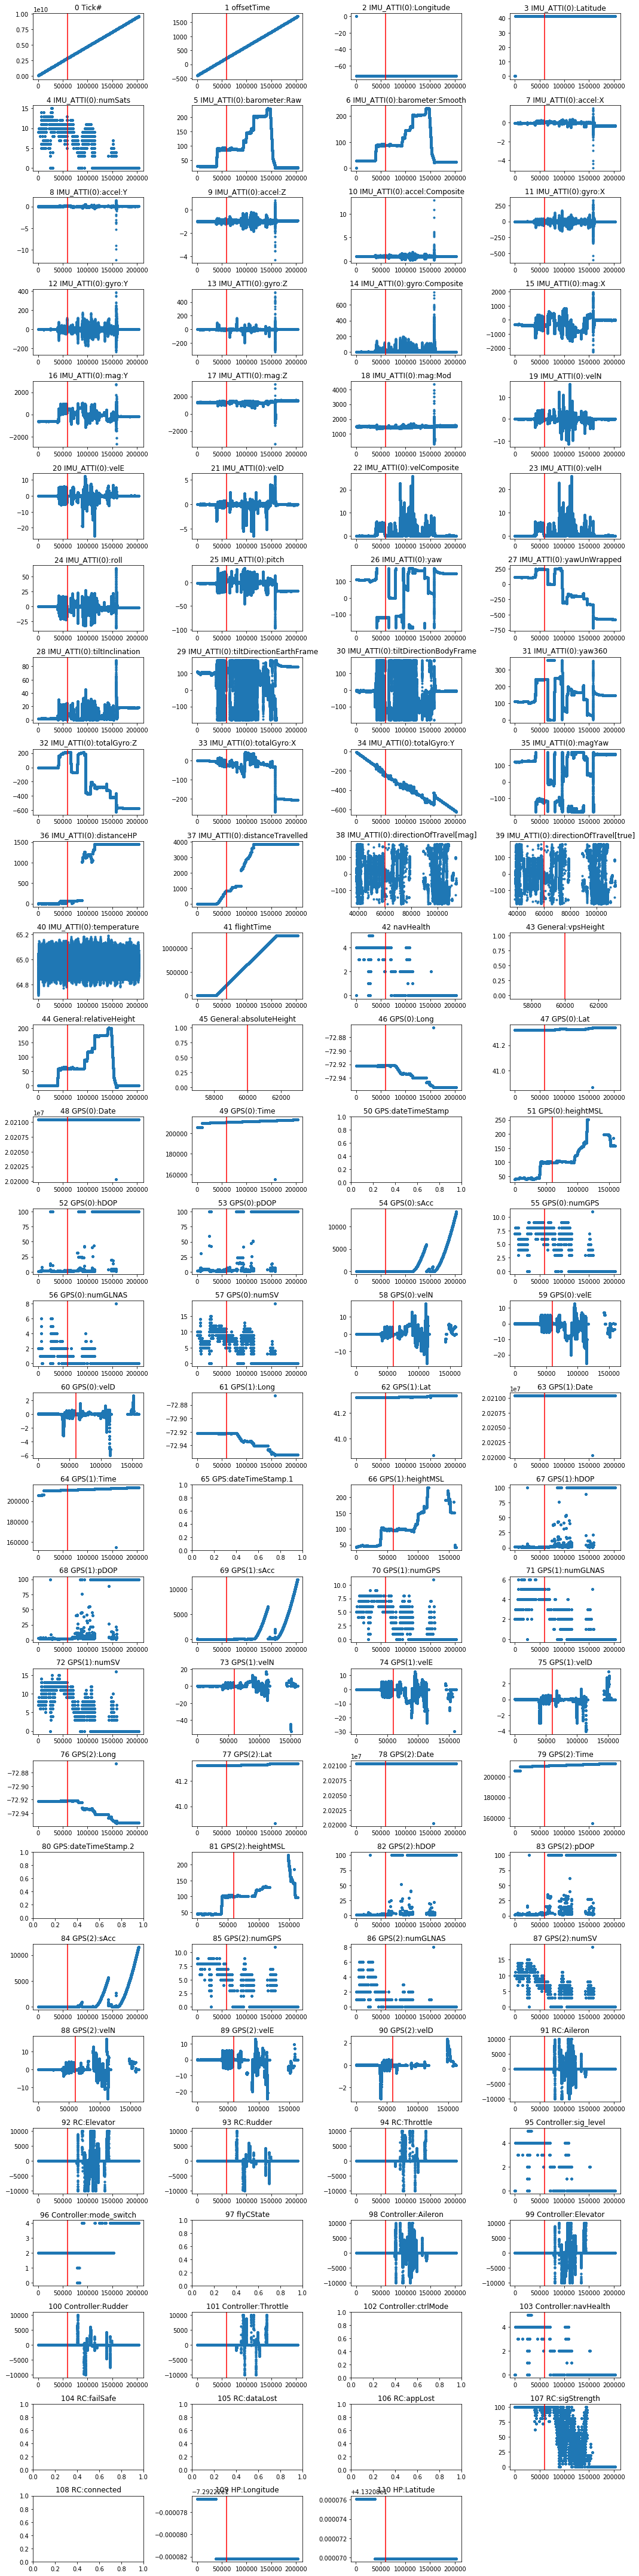

In [39]:
fig = plt.figure(figsize = (15,60))
counter2 = 0
counter = 1
for key in dronedat397.keys()[0:111]:
    ax = fig.add_subplot(28,4,counter)
    ax.set_title(str(counter2) +' '+ key)
    try:
        ax.plot(dronedat397[key], '.')
        ax.axvline(60000, color = 'red')
    except: pass
    counter +=1
    counter2 +=1
plt.tight_layout()

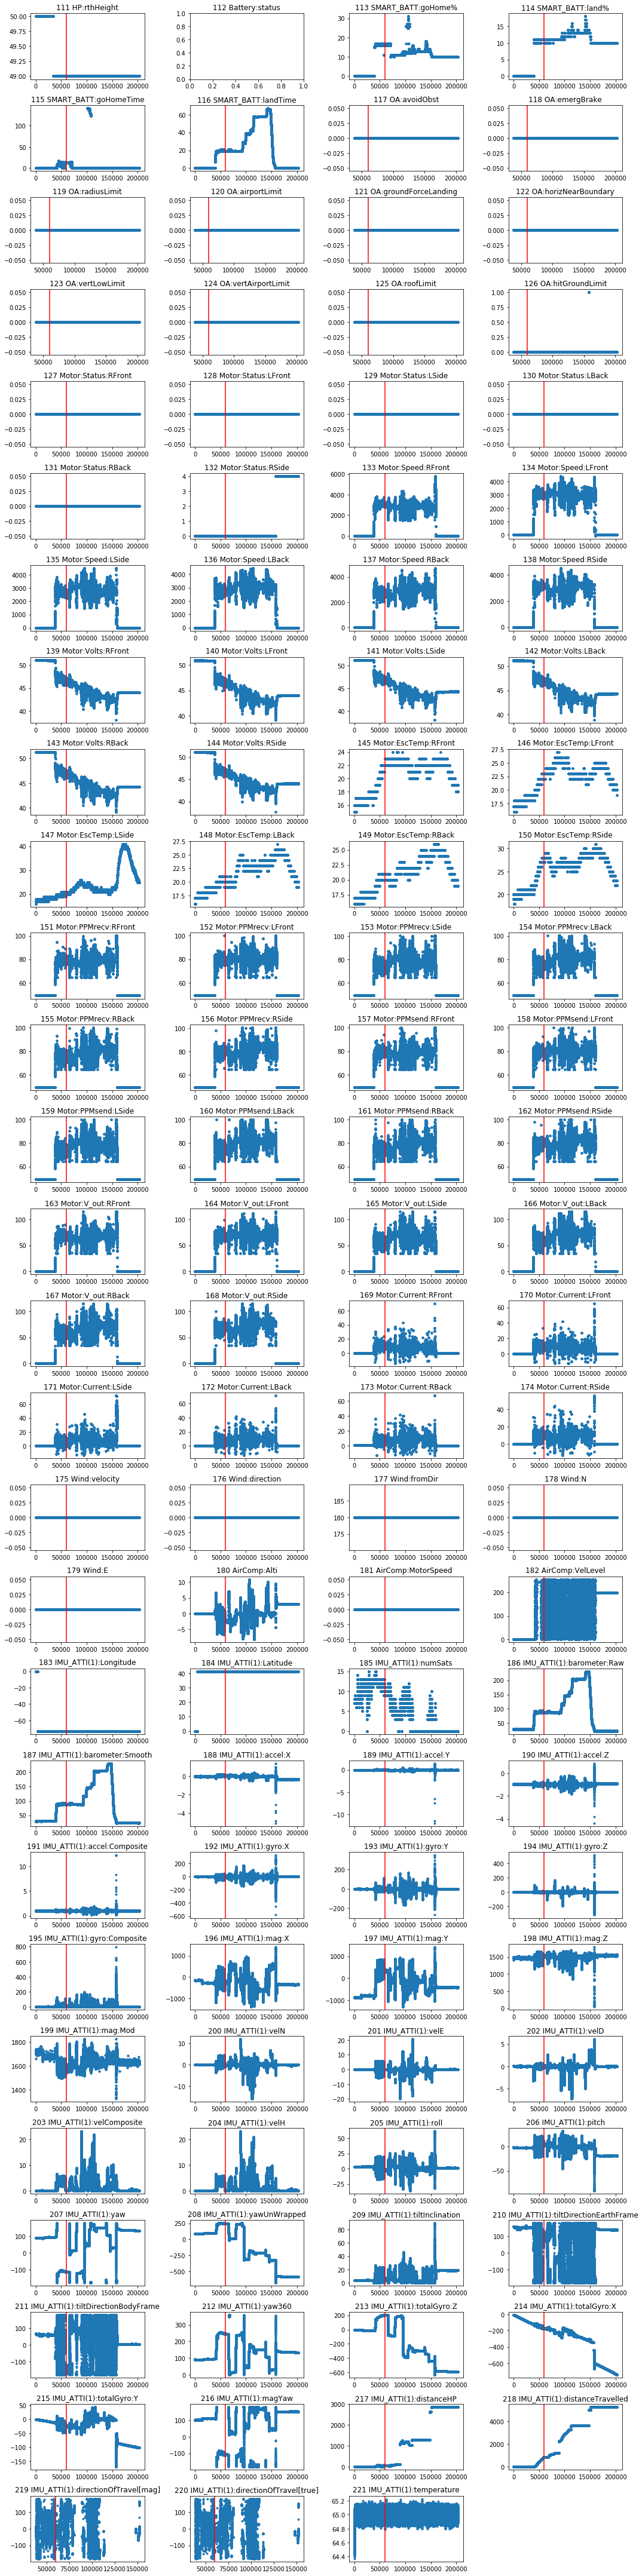

In [40]:
fig = plt.figure(figsize = (15,60))
counter = 1
for key in dronedat397.keys()[111:222]:
    ax = fig.add_subplot(28,4,counter)
    ax.set_title(str(counter2) +' '+ key)
    try:
        ax.plot(dronedat397[key], '.')
        ax.axvline(60000, color = 'red')
    except: pass
    counter +=1
    counter2 +=1
plt.tight_layout()

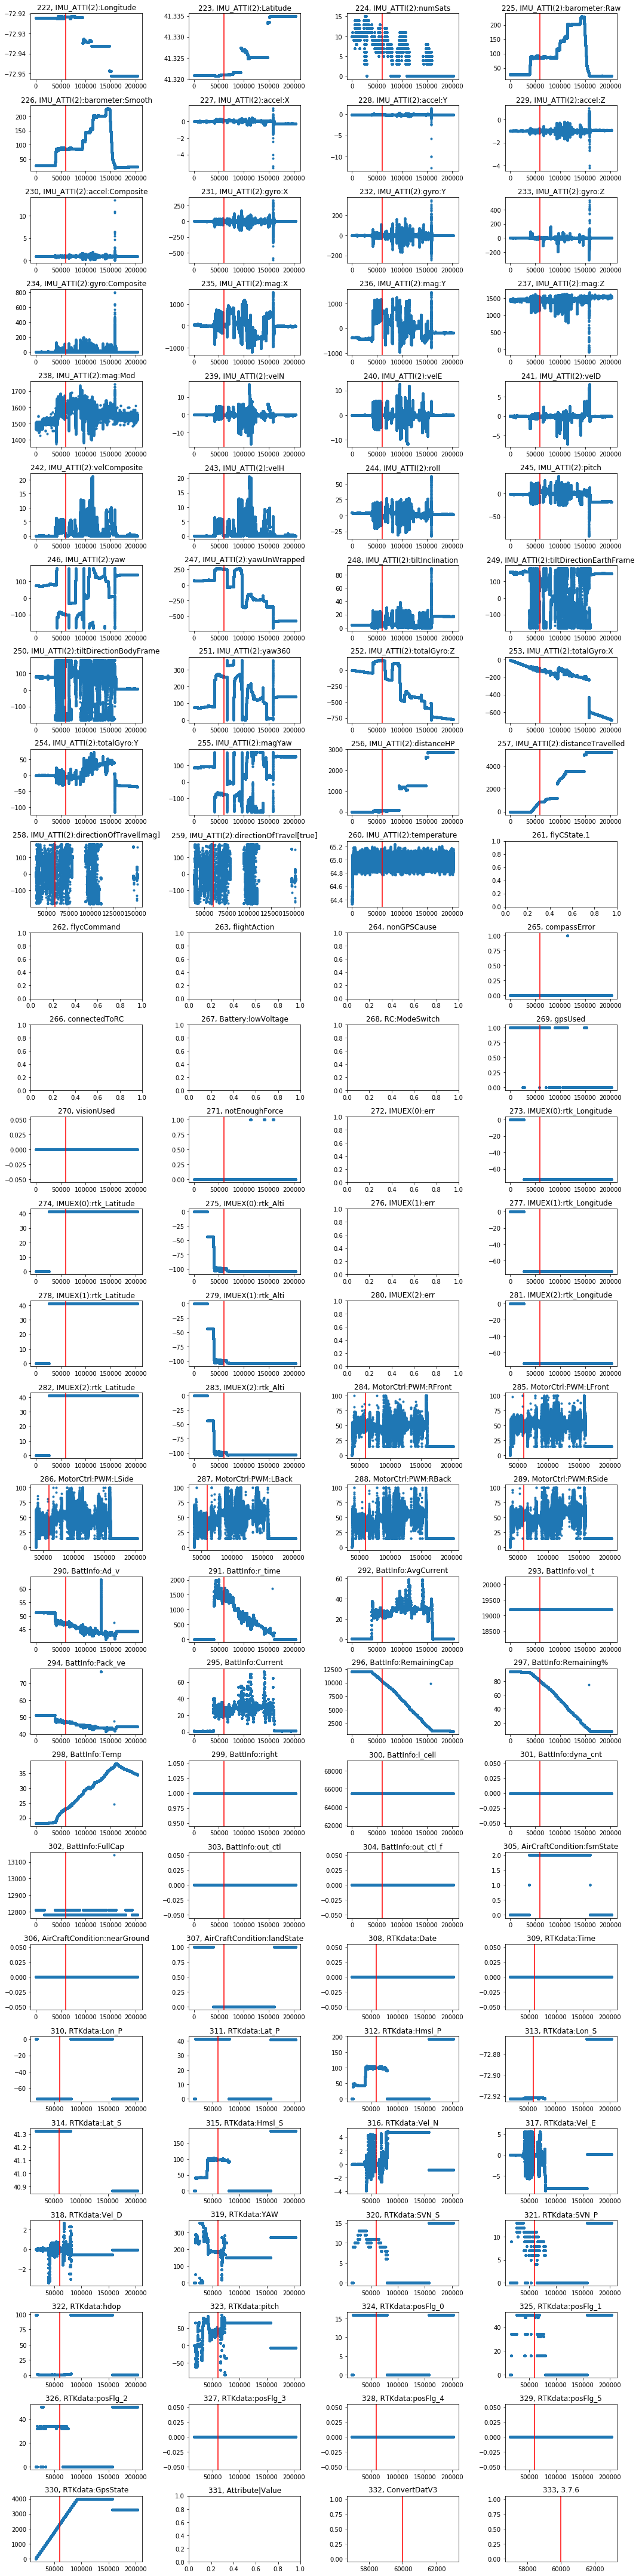

In [41]:
fig = plt.figure(figsize = (15,60))
counter = 1
for key in dronedat397.keys()[222:]:
    ax = fig.add_subplot(28,4,counter)
    ax.set_title(str(counter2) +', '+ key)
    try:
        ax.plot(dronedat397[key], '.')
        ax.axvline(60000, color = 'red')
    except: pass
    counter +=1
    counter2 +=1

plt.tight_layout()

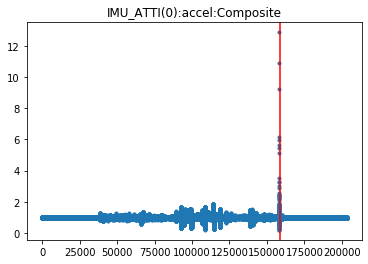

In [110]:

key = dronedat397.keys()[10]
plt.title(key)
plt.plot(dronedat397[key], '.')
plt.axvline(159000, color = 'red')


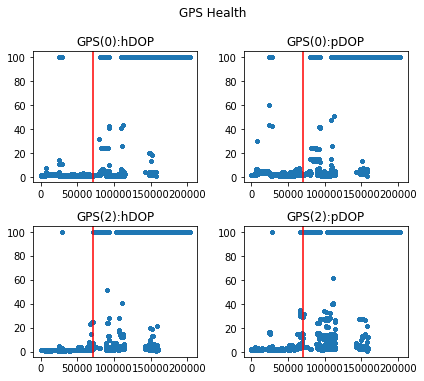

In [91]:
fig = plt.figure(figsize = (6,5))
counter = 1
for i in [52, 53, 82, 83]:
    ax = fig.add_subplot(2,2,counter)
    key = dronedat397.keys()[i]
    ax.set_title(key)
    ax.plot(dronedat397[key], '.')
    ax.axvline(71000, color = 'red')
    counter +=1
plt.suptitle('GPS Health', y=1.05)
plt.tight_layout()
plt.show()


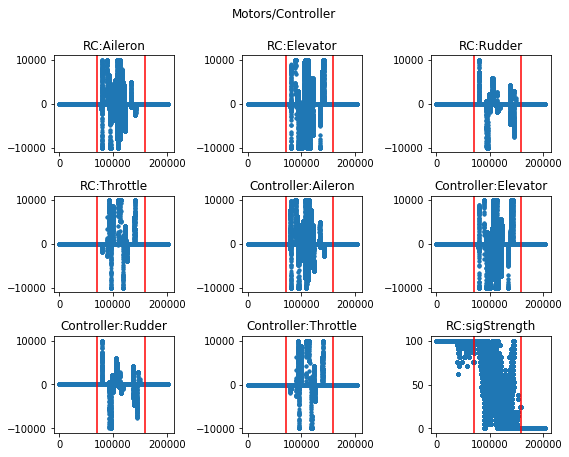

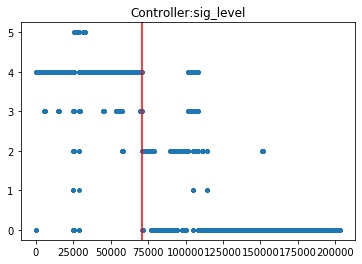

In [127]:
fig = plt.figure(figsize = (8,6))
counter = 1
for i in [91,92, 93, 94, 98, 99, 100, 101, 107]:
    ax = fig.add_subplot(3,3,counter)
    key = dronedat397.keys()[i]
    ax.set_title(key)
    ax.plot(dronedat397[key], '.')
    ax.axvline(71000, color = 'red')
#     ax.axvline(159000, color = 'red')
    counter +=1
plt.suptitle('Motors/Controller', y=1.05)
plt.tight_layout()
plt.show()


key = dronedat397.keys()[95]
plt.title(key)
plt.plot(dronedat397[key], '.')
plt.axvline(71000, color = 'red')


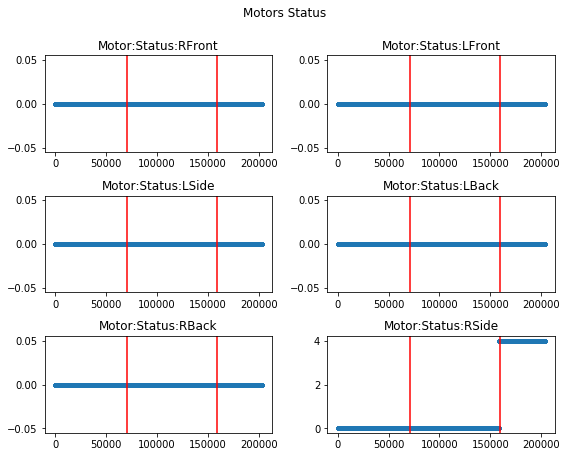

In [126]:
fig = plt.figure(figsize = (8,6))
counter = 1
for i in np.arange(127,133):
    ax = fig.add_subplot(3,2,counter)
    key = dronedat397.keys()[i]
    ax.set_title(key)
    ax.plot(dronedat397[key], '.')
    ax.axvline(71000, color = 'red')
    ax.axvline(159000, color = 'red')

    counter +=1
plt.suptitle('Motors Status', y=1.05)
plt.tight_layout()
plt.show()

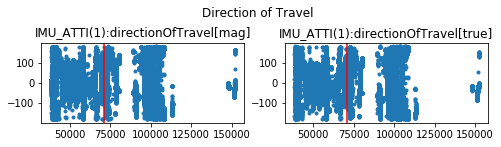

In [100]:
fig = plt.figure(figsize = (8,5))
counter = 1
for i in [219, 220]:
    ax = fig.add_subplot(3,2,counter)
    key = dronedat397.keys()[i]
    ax.set_title(key)
    ax.plot(dronedat397[key], '.')
    ax.axvline(71000, color = 'red')
    counter +=1
plt.suptitle('Direction of Travel')
# plt.tight_layout()
plt.show()

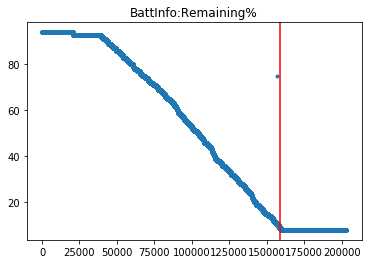

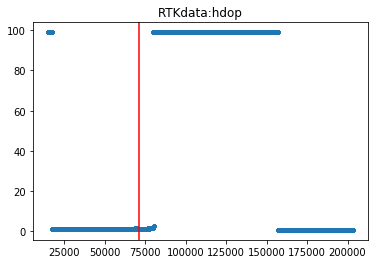

In [124]:
key = dronedat397.keys()[297]
plt.title(key)
plt.plot(dronedat397[key], '.')
plt.axvline(159000, color = 'red')

plt.show()

key = dronedat397.keys()[322]
plt.title(key)
plt.plot(dronedat397[key], '.')
plt.axvline(71000, color = 'red')


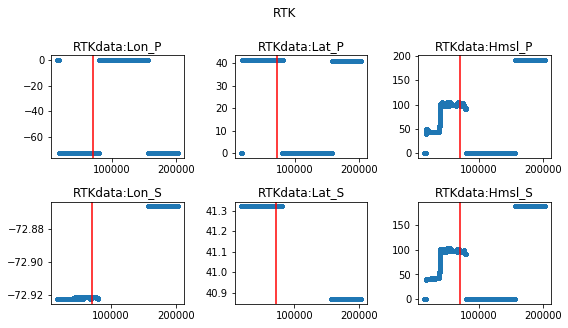

In [113]:
fig = plt.figure(figsize = (8,6))
counter = 1
for i in np.arange(310,316):
    ax = fig.add_subplot(3,3,counter)
    key = dronedat397.keys()[i]
    ax.set_title(key)
    ax.plot(dronedat397[key], '.')
    ax.axvline(71000, color = 'red')
    counter +=1
plt.suptitle('RTK', y=1.05)
plt.tight_layout()
plt.show()


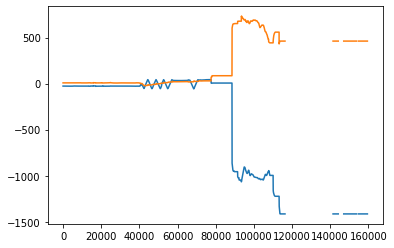

In [53]:
plt.plot(homepoint[0])
plt.plot(homepoint[1])


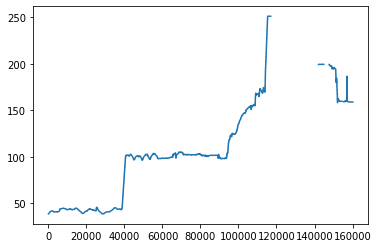

In [52]:
plt.plot(dronedat397['GPS(0):heightMSL'])

In [117]:
gpsdat.keys()

dict_keys(['IMU_ATTI(0):Latitude', 'GPS(0):Lat', 'GPS(1):Lat', 'GPS(2):Lat', 'HP:Latitude', 'IMU_ATTI(1):Latitude', 'IMU_ATTI(2):Latitude', 'IMUEX(0):rtk_Latitude', 'IMUEX(1):rtk_Latitude', 'IMUEX(2):rtk_Latitude', 'RTKdata:Lat_P', 'RTKdata:Lat_S'])

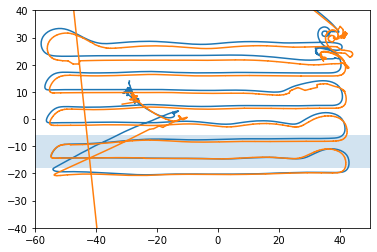

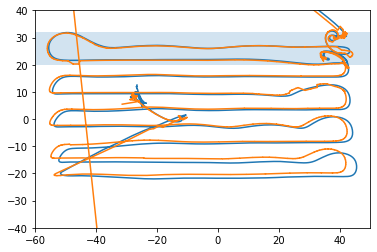

In [271]:
# plt.plot(annieflightdata.coords_xyz_prime[:,0], annieflightdata.coords_xyz_prime[:,1], alpha = 0.7, label = 'annie gps')
# plt.plot(gpsdat['RTKdata:Lat_P'][0], gpsdat['RTKdata:Lat_P'][1])

xoffset = 2
yoffset = -3
plt.plot(annieflightdata.coords_xyz_prime[:,0]-xoffset, annieflightdata.coords_xyz_prime[:,1]-yoffset)
plt.plot(gpsdat['RTKdata:Lat_P'][0], gpsdat['RTKdata:Lat_P'][1])
plt.xlim(-60,50)
plt.ylim(-40,40)
plt.axhspan(-18, -6, alpha = 0.2)
plt.show()

xoffset = -0.5
yoffset = -1.5
plt.plot(annieflightdata.coords_xyz_prime[:,0]-xoffset, annieflightdata.coords_xyz_prime[:,1]-yoffset)
plt.plot(gpsdat['RTKdata:Lat_P'][0], gpsdat['RTKdata:Lat_P'][1])
plt.xlim(-60,50)
plt.ylim(-40,40)
plt.axhspan(20,32, alpha = 0.2)

# plt.xlim(25,43)
# plt.ylim(15,40)
# plt.xlim(-60,-5)
# plt.ylim(-25,5)

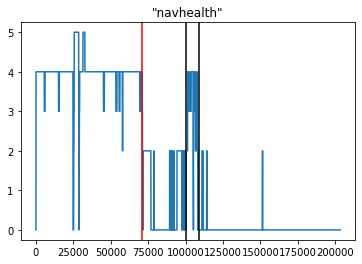

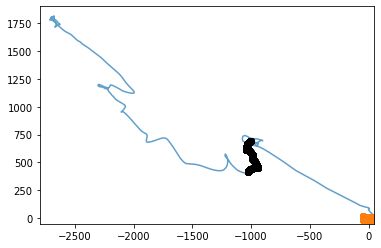

In [279]:
plt.plot(dronedat397.navHealth)
plt.axvline(71000, color = 'red')
plt.axvline(100000, color = 'black')
plt.axvline(109000, color = 'black')
plt.title('"navhealth"')
plt.show()

plt.plot(annieflightdata.coords_xyz_prime[:,0], annieflightdata.coords_xyz_prime[:,1], alpha = 0.7, label = 'annie gps')
# plt.plot(gpsdat['RTKdata:Lat_P'][0][60000:71000], gpsdat['RTKdata:Lat_P'][1][60000:71000], '.')
# plt.plot(gpsdat['RTKdata:Lat_S'][0], gpsdat['RTKdata:Lat_S'][1])
# plt.plot(gpsdat['GPS(1):Lat'][0][60000:71000], gpsdat['GPS(1):Lat'][1][60000:71000], '.')
# plt.plot(gpsdat['RTKdata:Lat_P'][0][0:71000], gpsdat['RTKdata:Lat_P'][1][0:71000], '.')

# plt.plot(gpsdat['RTKdata:Lat_P'][0][0:71000], gpsdat['RTKdata:Lat_P'][1][0:71000], '.')
# plt.plot(gpsdat['RTKdata:Lat_P'][0][100000:109000], gpsdat['RTKdata:Lat_P'][1][100000:109000], 'o')

plt.plot(gpsdat['GPS(1):Lat'][0][0:71000], gpsdat['GPS(1):Lat'][1][0:71000], '.')
plt.plot(gpsdat['GPS(1):Lat'][0][100000:109000], gpsdat['GPS(1):Lat'][1][100000:109000], alpha = 0.1, marker = 'o', color = 'black')

plt.xlim(-2800,50)
plt.ylim(-50,1900)

plt.show()


# fig = plt.figure(figsize = (8,5))

# ax = fig.add_subplot(1,2,1)
# ax.set_title(key)
# ax.plot(dronedat397[key], '.')
# ax.axvline(71000, color = 'red')

# plt.suptitle('Direction of Travel')
# # plt.tight_layout()
# plt.show()

In [184]:
for i, key in enumerate(dronedat397.keys()):
    if 'GPS' in key or 'gps' in key: 
        print(i, key)


46 GPS(0):Long
47 GPS(0):Lat
48 GPS(0):Date
49 GPS(0):Time
50 GPS:dateTimeStamp
51 GPS(0):heightMSL
52 GPS(0):hDOP
53 GPS(0):pDOP
54 GPS(0):sAcc
55 GPS(0):numGPS
56 GPS(0):numGLNAS
57 GPS(0):numSV
58 GPS(0):velN
59 GPS(0):velE
60 GPS(0):velD
61 GPS(1):Long
62 GPS(1):Lat
63 GPS(1):Date
64 GPS(1):Time
65 GPS:dateTimeStamp.1
66 GPS(1):heightMSL
67 GPS(1):hDOP
68 GPS(1):pDOP
69 GPS(1):sAcc
70 GPS(1):numGPS
71 GPS(1):numGLNAS
72 GPS(1):numSV
73 GPS(1):velN
74 GPS(1):velE
75 GPS(1):velD
76 GPS(2):Long
77 GPS(2):Lat
78 GPS(2):Date
79 GPS(2):Time
80 GPS:dateTimeStamp.2
81 GPS(2):heightMSL
82 GPS(2):hDOP
83 GPS(2):pDOP
84 GPS(2):sAcc
85 GPS(2):numGPS
86 GPS(2):numGLNAS
87 GPS(2):numSV
88 GPS(2):velN
89 GPS(2):velE
90 GPS(2):velD
264 nonGPSCause
269 gpsUsed


In [278]:
def getcolsname(*keywords_list):
    for i, key in enumerate(dronedat397.keys()):
        for keyword in list(keywords_list):
            if keyword in key: 
                print(i, key)
            
getcolsname('vel')

19 IMU_ATTI(0):velN
20 IMU_ATTI(0):velE
21 IMU_ATTI(0):velD
22 IMU_ATTI(0):velComposite
23 IMU_ATTI(0):velH
37 IMU_ATTI(0):distanceTravelled
38 IMU_ATTI(0):directionOfTravel[mag]
39 IMU_ATTI(0):directionOfTravel[true]
58 GPS(0):velN
59 GPS(0):velE
60 GPS(0):velD
73 GPS(1):velN
74 GPS(1):velE
75 GPS(1):velD
88 GPS(2):velN
89 GPS(2):velE
90 GPS(2):velD
95 Controller:sig_level
175 Wind:velocity
182 AirComp:VelLevel
200 IMU_ATTI(1):velN
201 IMU_ATTI(1):velE
202 IMU_ATTI(1):velD
203 IMU_ATTI(1):velComposite
204 IMU_ATTI(1):velH
218 IMU_ATTI(1):distanceTravelled
219 IMU_ATTI(1):directionOfTravel[mag]
220 IMU_ATTI(1):directionOfTravel[true]
239 IMU_ATTI(2):velN
240 IMU_ATTI(2):velE
241 IMU_ATTI(2):velD
242 IMU_ATTI(2):velComposite
243 IMU_ATTI(2):velH
257 IMU_ATTI(2):distanceTravelled
258 IMU_ATTI(2):directionOfTravel[mag]
259 IMU_ATTI(2):directionOfTravel[true]


In [ ]:
#see what unique outputs exist for non-numerical columns, assign them numbers, plot and see trends 